<h1>Bài 4(Lập trình)

<p>Cho dữ liệu Red Wine Quality2, liên quan đến các mẫu rượu vang Vinho Verde đỏ từ phía bắc Bồ Đào Nha. Mục tiêu của bài toán là mô hình hóa chất lượng rượu dựa trên các chỉ số hóa lý đo đạc được.
<p>Sử dụng câu lệnh sau để chia dữ liệu đầu vào thành hai phần huấn luyện 70% và kiểm thử 30%.

<h3>1. Import các thư viện cần thiết

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


<h3>2. Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện và số lượng dữ liệu kiểm thử 

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<h3>3. Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ.

<p>Kết hợp với thư viện biểu diễn đồ thị seaborn để trực quan hóa kết quả bằng đồ thị
heatmap.


<Axes: >

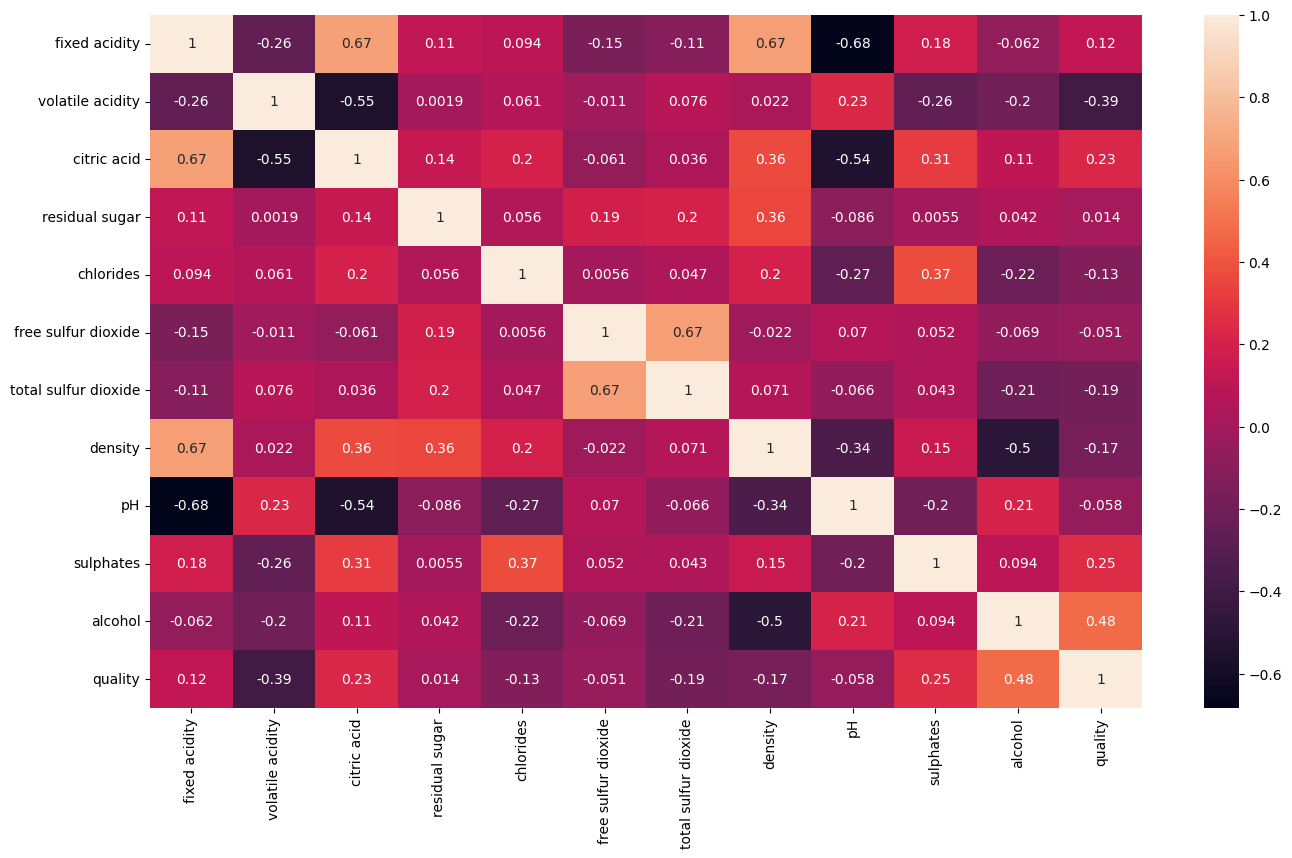

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'),annot=True)

<p>Trong đồ thị này, màu càng đậm chứng tỏ mức độ tương đồng càng thấp.
<p>Nhận thấy, không có thuộc tính nào tương đồng cao với nhau nên không cần thiết phải loại bỏ cột nào.


<h3>4. Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

<p>Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình thường) và biến labels (chứa riêng thuộc tính quyết định ‘quality’) bằng câu lệnh sau.

In [6]:
feature = df.drop('quality',axis=1)
label = df['quality']

<p>Với data là DataFrame chứa toàn bộ dữ liệu Wine Quality đã gộp lại ở yêu cầu tiền xử lý.

<h3>5. Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện.

<p>Tất cả dữ liệu đều thuộc nhóm định lượng

<h3>6. Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử với ỷ lệ 7-3

In [7]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size=0.3,random_state=42)

<h3>7. Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

<p>Để xây dựng cây ID3, sinh viên thực hiện câu lệnh sau.

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<p>Với biến criterion=’entropy’ để yêu cầu thư viện thực hiện phân nhánh theo information gain. Sinh viên có thể tham khảo thêm các cài đặt ở tài liệu của thư viện sklearn.

<P>Với random_state là đối tượng điều khiển sự ngẫu nhiên trong quá trình phân tách

<p>Sau khi xây dựng xong cây ID3, tiến hành áp dụng mô hình trên dữ liệu kiểm thử. Thư viện này cũng sẽ hỗ trợ việc tính toán các thông tin như độ chính xác, độ phủ của mô hình đã xây dựng

In [9]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 0.5833333333333334
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.12      0.10        17
           5       0.70      0.66      0.68       195
           6       0.60      0.60      0.60       200
           7       0.43      0.46      0.44        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.33      0.34       480
weighted avg       0.59      0.58      0.59       480



<p>Tính toán ma trận nhầm lẫn

In [10]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

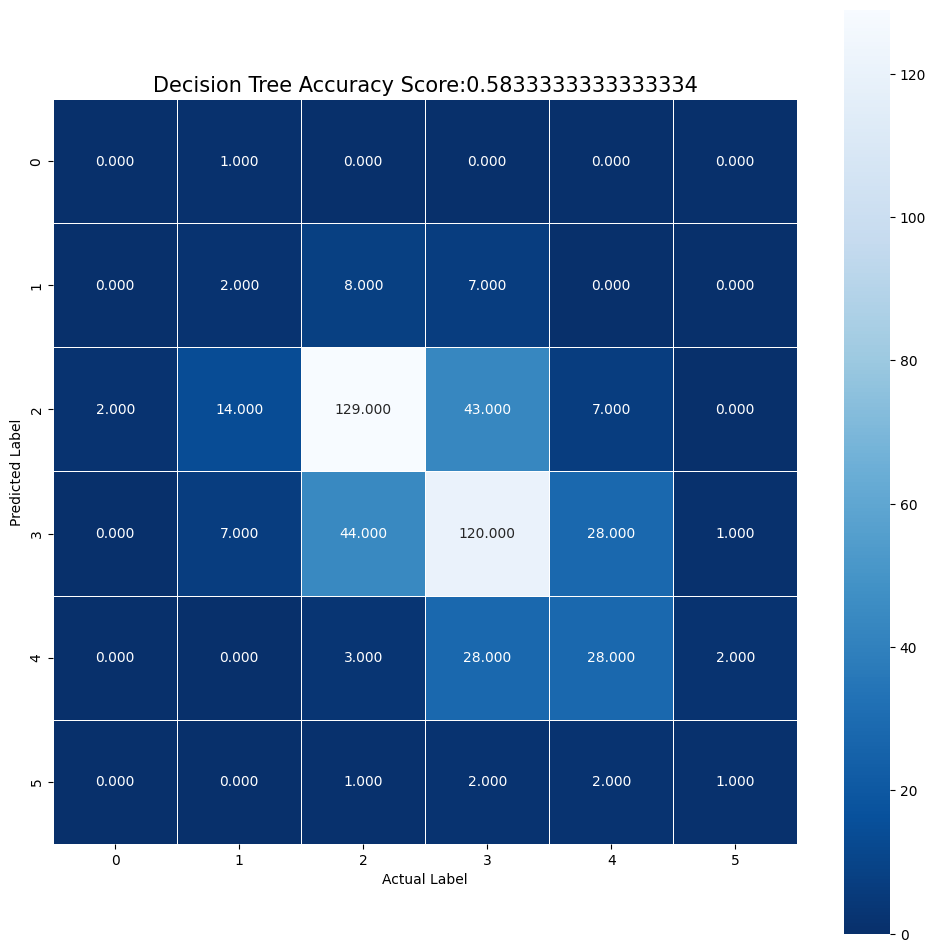

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

<p>Biểu diễn cây ID3 bằng câu lệnh.

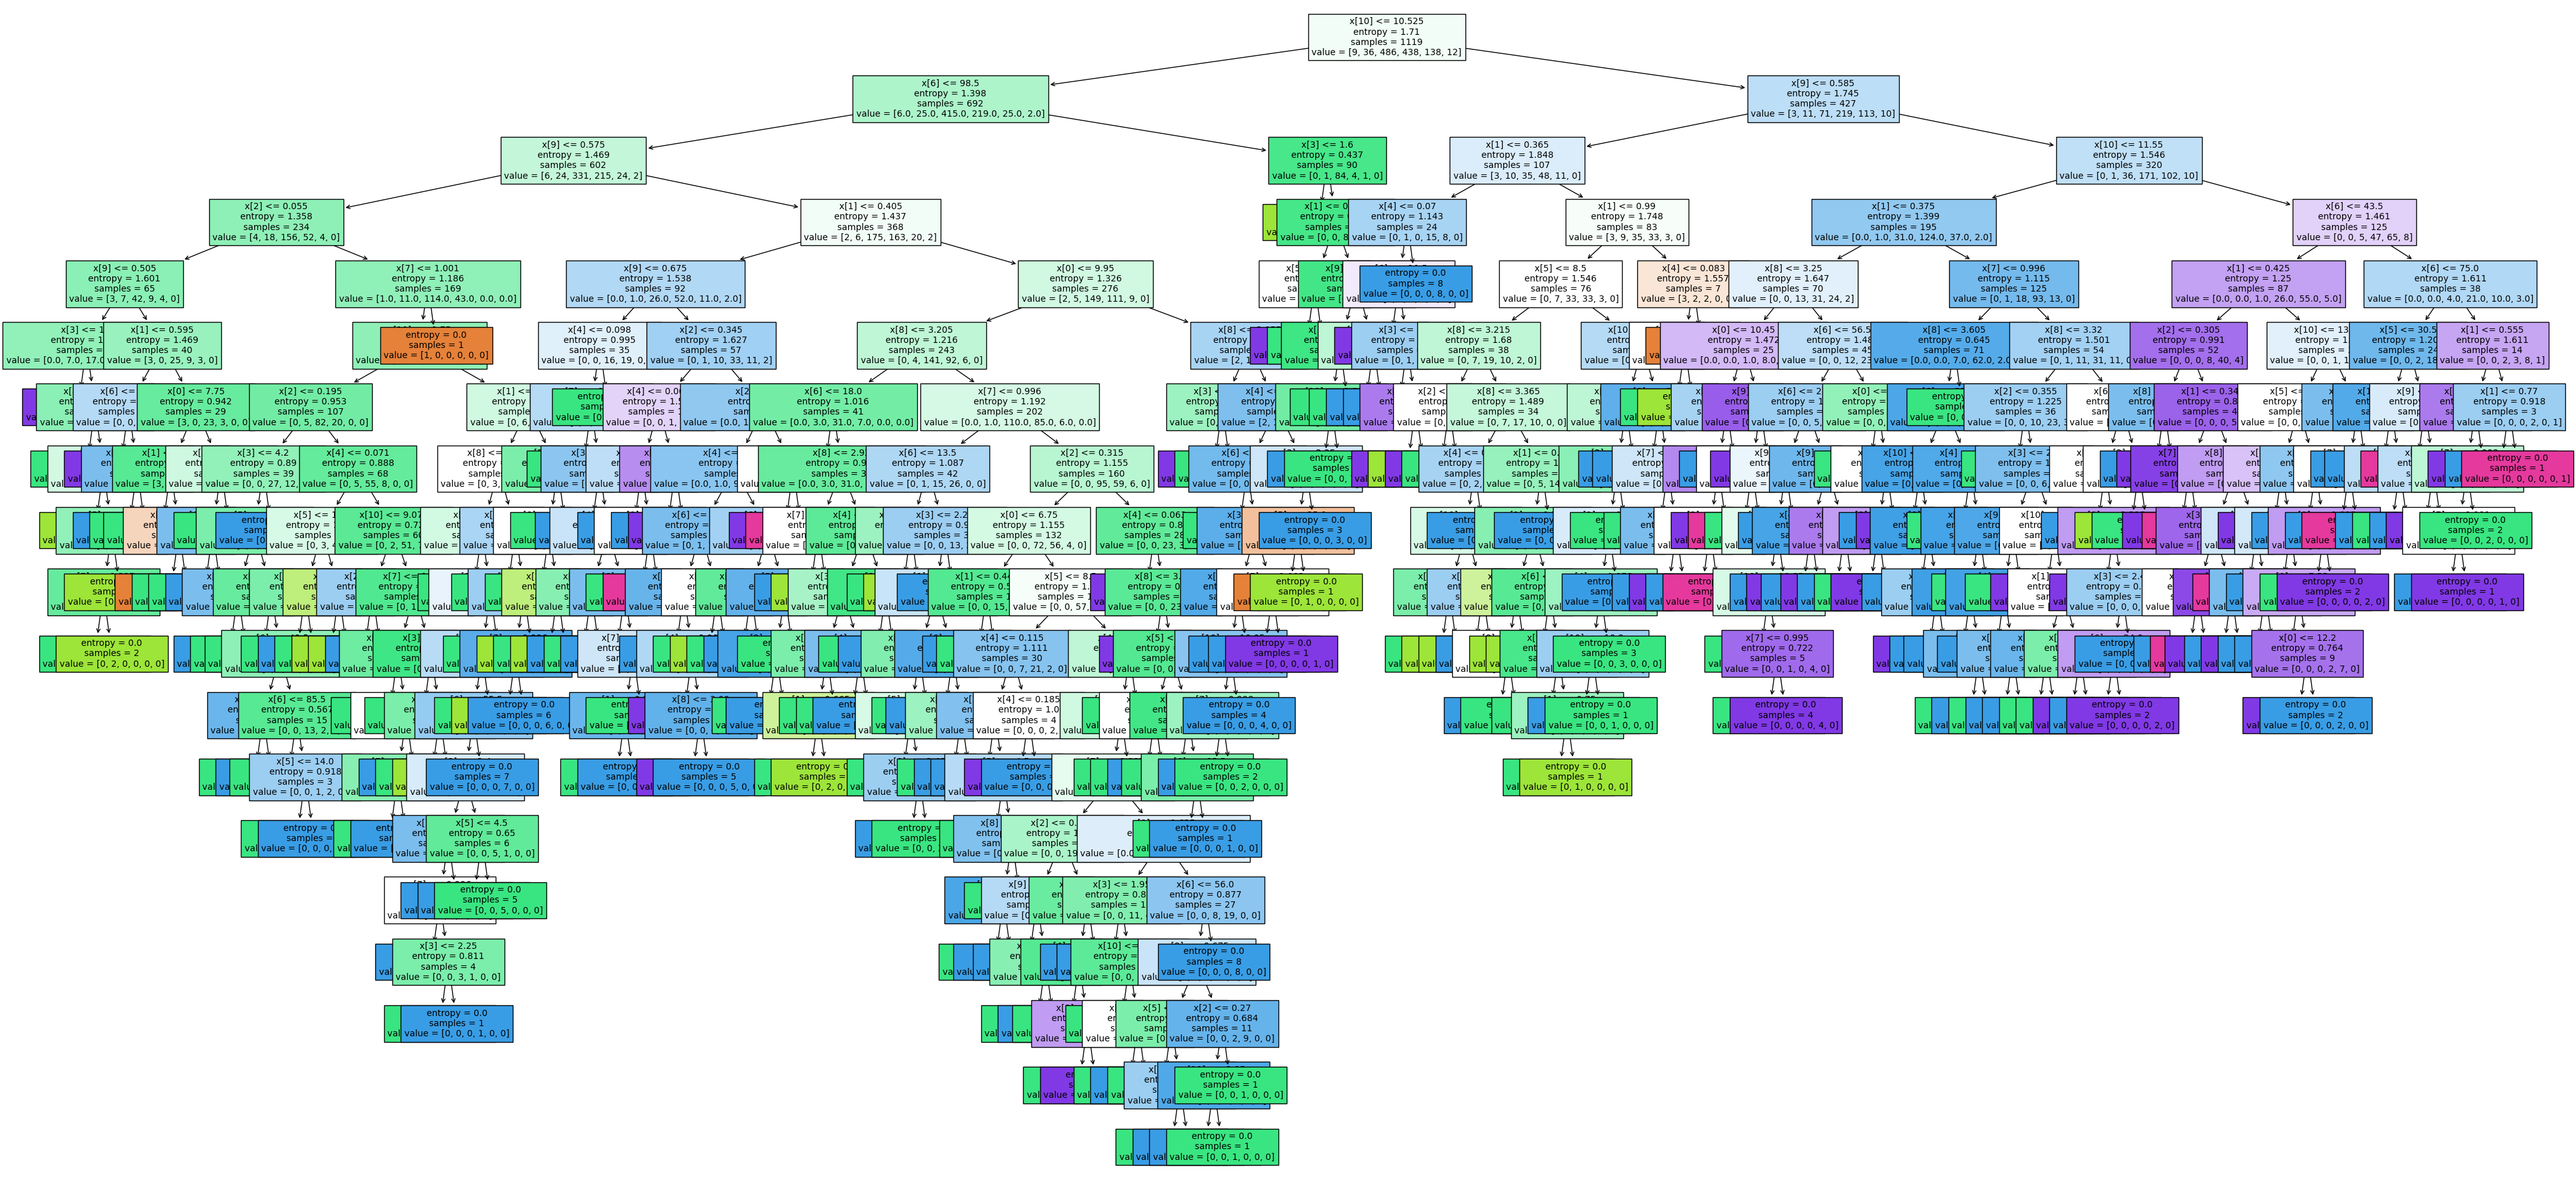

In [12]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

<p>Câu lệnh savefig với dpi=100 giúp lưu lại cây vào file ‘decision_tree.png’ với chất
lượng tốt.

<h3>8. Lặp lại yêu cầu 7 đối với cây CART.

In [13]:
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
tree_pred = clf2.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 0.5625
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.64      0.62      0.63       195
           6       0.57      0.58      0.57       200
           7       0.45      0.49      0.47        61
           8       0.33      0.33      0.33         6

    accuracy                           0.56       480
   macro avg       0.34      0.35      0.35       480
weighted avg       0.56      0.56      0.56       480



<p>Tính toán ma trận nhầm lẫn

In [15]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

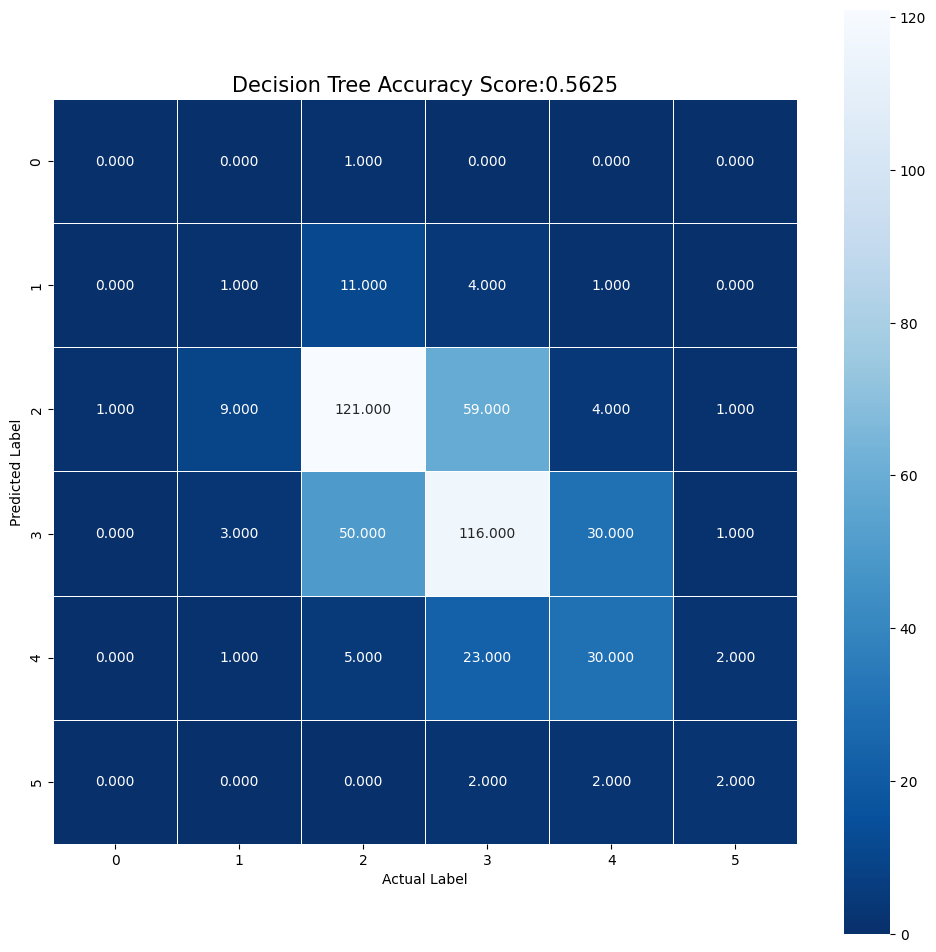

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

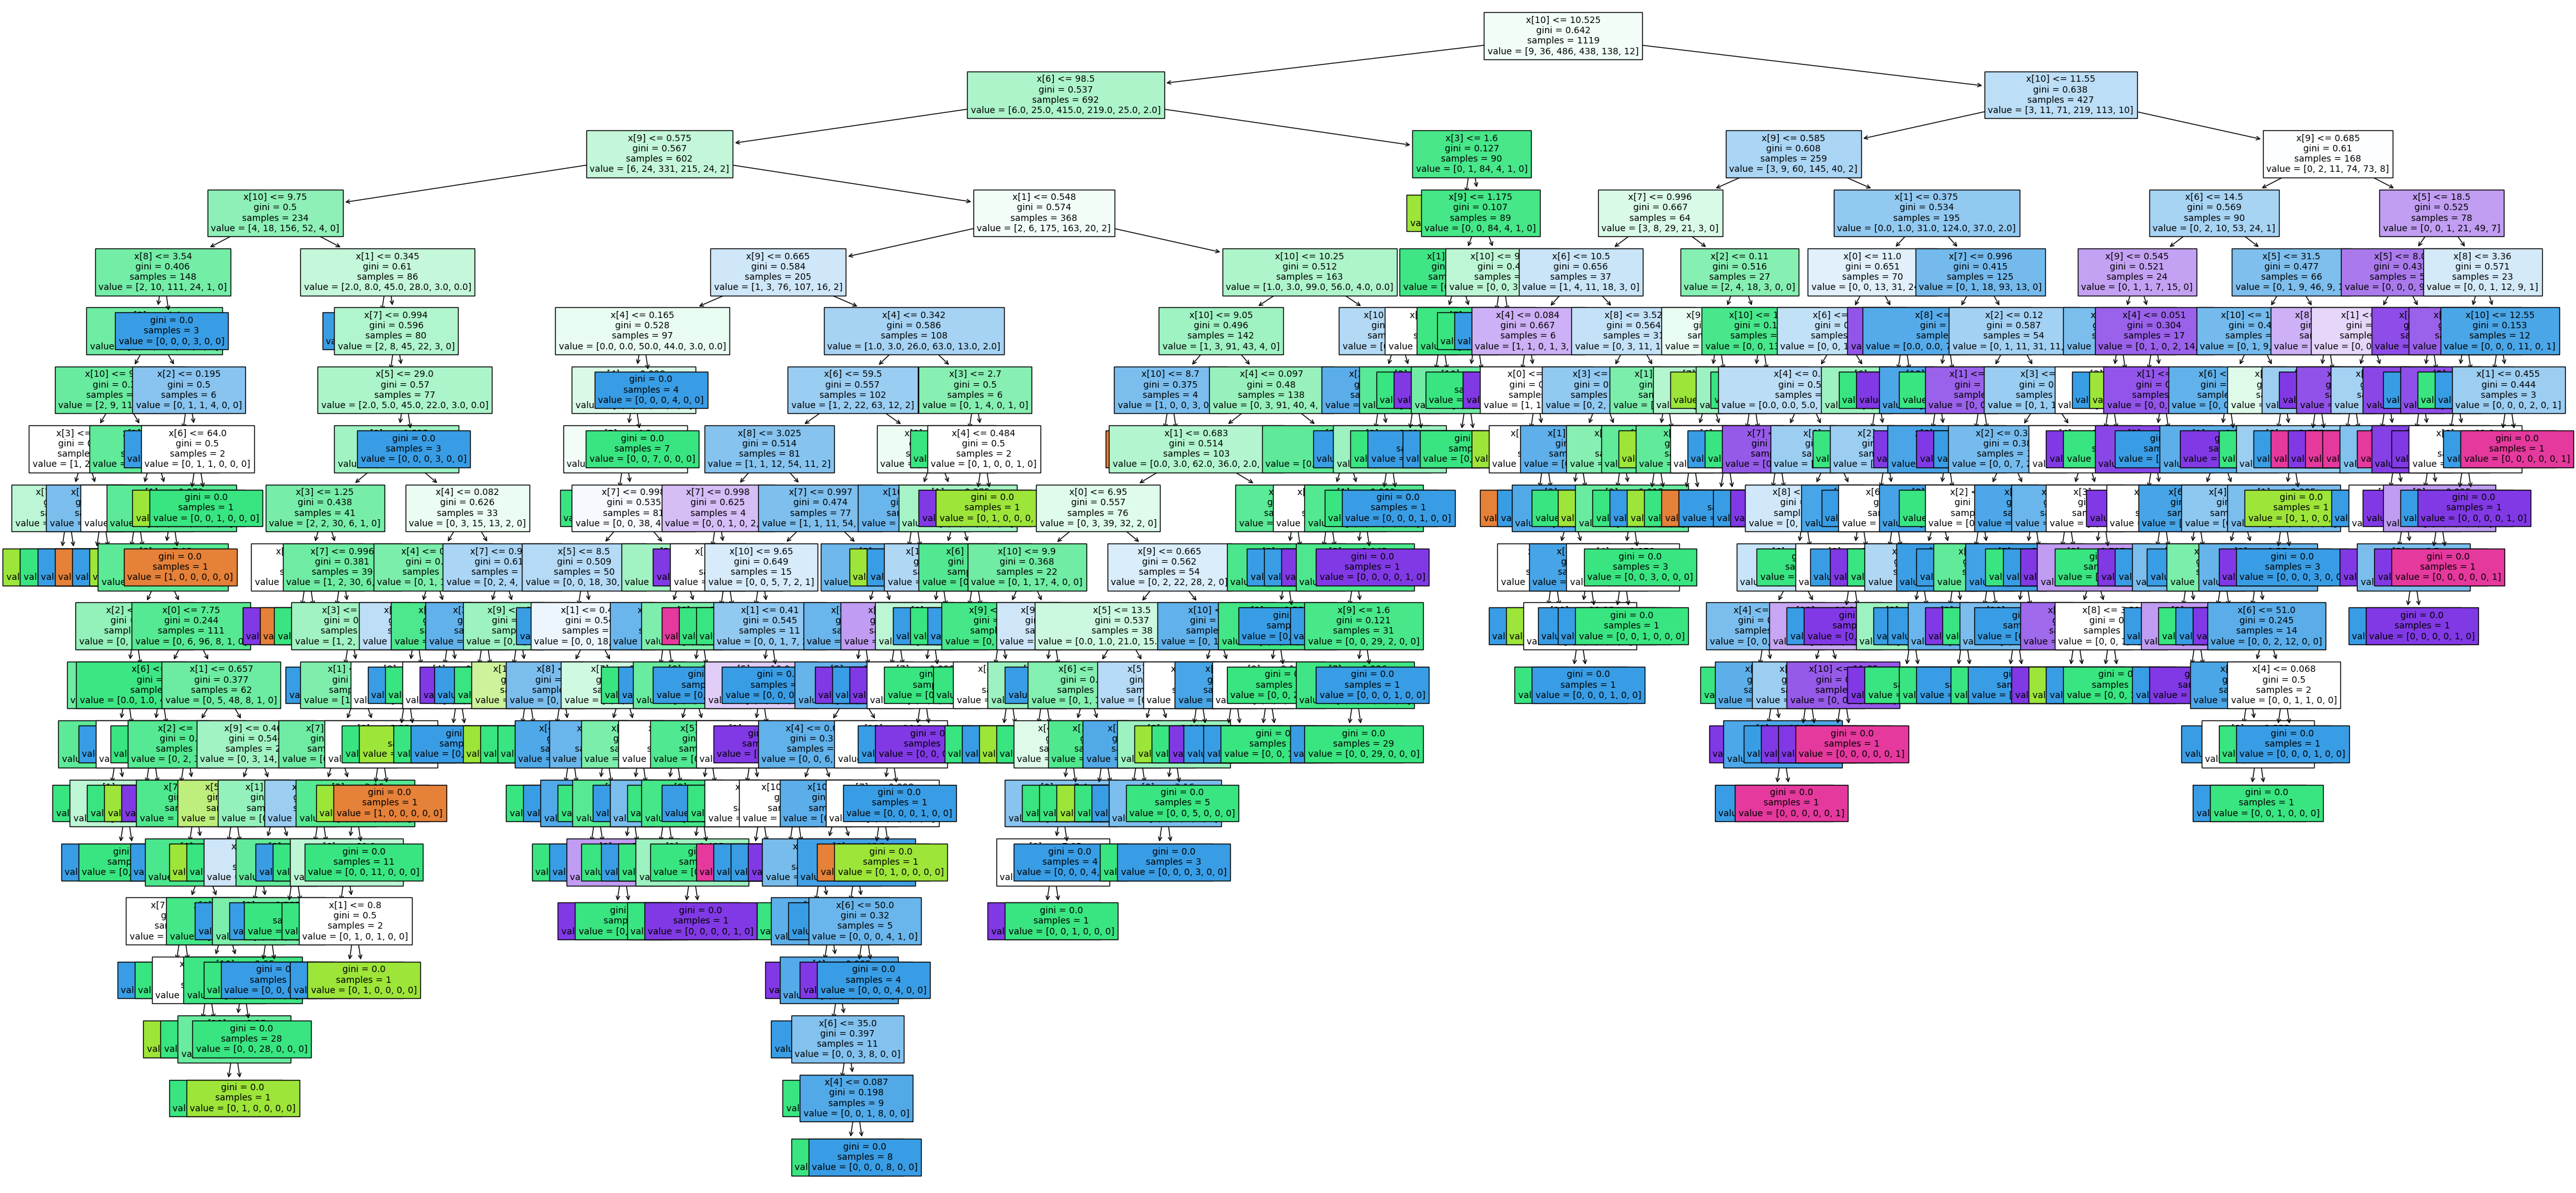

In [17]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf2,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

<h3>9.	Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được.

<p>Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh sau

In [18]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train,y_train).predict(x_test)


<p>Và biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap.

In [19]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.5416666666666666
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



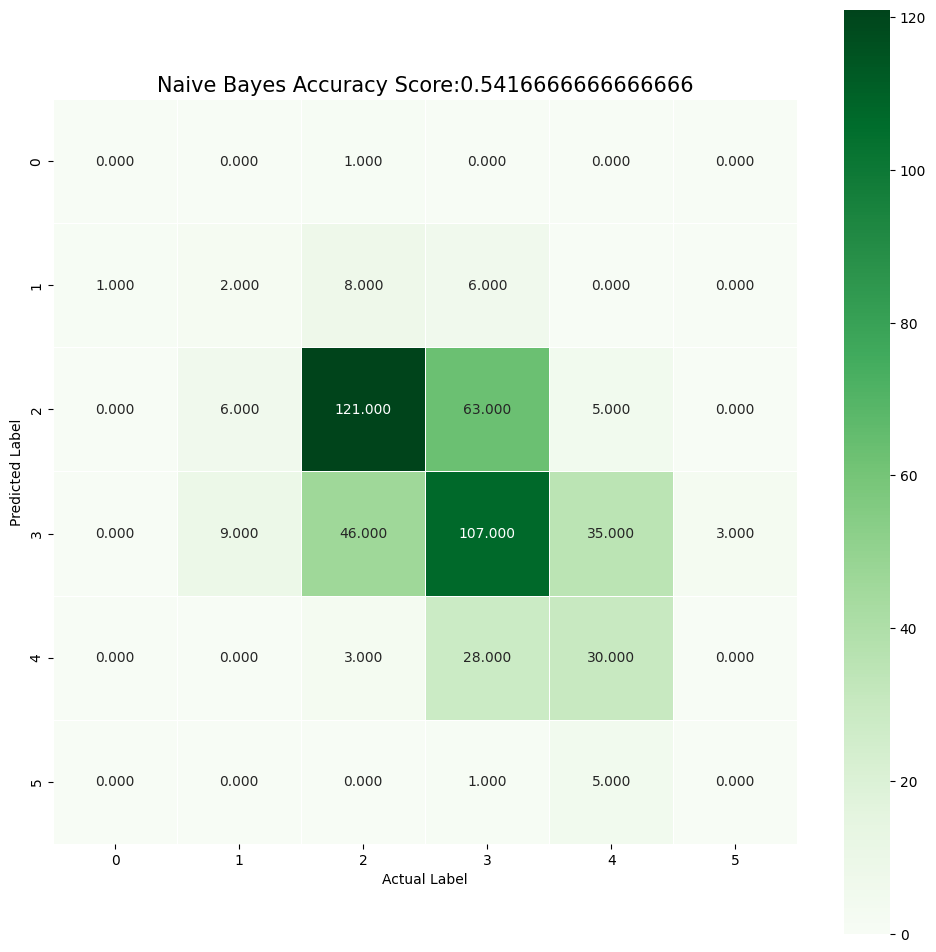

In [20]:
bayes_cm = metrics.confusion_matrix(y_test,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Naive Bayes Accuracy Score:{0}'.format(bayes_score)
plt.title(title,size=15);

<h3>10.	So sánh kết quả của các mô hình trên.

<p>Dựa vào mô hình ta có độ chính xác của:
<ul>
<li>Thuật toán cây ID3 cao nhất (0.5833)
<li>Thuật toán Naive Bayes là thấp nhất (0.5416)
</ul>
<p>Vậy đối với mô hình này sử dụng thuật toán cây quyết định ID3 là tốt nhất.